<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению
<center>
Автор материала: Юрий Кашницкий, программист-исследователь Mail.Ru Group <br>

Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 1 (демо).<br> Анализ данных по доходу населения UCI Adult</center>

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным репозитория UCI [Adult](https://archive.ics.uci.edu/ml/datasets/Adult) (качать данные не надо – они уже есть в репозитории).**

Уникальные значения признаков (больше информации по ссылке выше):
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- salary: >50K,<=50K

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.container import BarContainer
from matplotlib.axes import Axes
from pandas.core.groupby import DataFrameGroupBy


def mount_google_drive() -> bool | None:
    """
    Function to mount Google Drive.
    :return: True if mounting is successful, None otherwise.
    """
    try:
        from google.colab.drive import mount

        mount(mountpoint="/content/drive")
        return True

    except Exception as error:
        print(f"Error while mounting Google Drive: {error}")
        raise


def get_google_drive_dataset_path() -> str:
    """
    Function to retrieve the path of the raw dataset from Google Drive.
    :return: Path of raw dataset as a string.
    """
    google_drive_dataset_path: str = "/content/drive/MyDrive/Hillel/Machine_Learning_Course/HW3/adult.data.csv"
    return google_drive_dataset_path


def get_data_frame(dataset_path: str) -> pd.DataFrame | None:
    """
    Function to convert the dataset into a pd.DataFrame.
    :param dataset_path: Path or URL of the dataset.
    :return: pd.DataFrame containing the dataset, or None if errors occur.
    """
    try:
        return pd.read_csv(filepath_or_buffer=dataset_path)

    except Exception as error:
        print(f"Error while converting dataset to NumPy array: {error}")
        raise


def main() -> pd.DataFrame | None:
    """
    Main function to start the app.
    :return: pd.DataFrame containing the dataset, or None if errors occur.
    """
    if mount_google_drive():
        import os

        google_drive_dataset_path: str = get_google_drive_dataset_path()
        if os.path.exists(path=google_drive_dataset_path):
            dataset_path: str = google_drive_dataset_path

            return get_data_frame(dataset_path=dataset_path)

        else:
            print("Dataset path doesn't exists.")
            raise FileNotFoundError


if __name__ == "__main__":
    raw_data_frame: pd.DataFrame | None = main()

    raw_data_frame_rows: int = raw_data_frame.shape[0]

columns_to_change_dtype: list = ["age", "hours-per-week", "education-num", "capital-loss"]
raw_data_frame[columns_to_change_dtype]: pd.DataFrame = raw_data_frame[columns_to_change_dtype].astype("int16")

raw_data_frame["capital-gain"]: pd.DataFrame = raw_data_frame["capital-gain"].astype("int32")

raw_data_frame.info()
# raw_data_frame.head(n=10)
# raw_data_frame.tail(n=10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int16 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int16 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int32 
 11  capital-loss    32561 non-null  int16 
 12  hours-per-week  32561 non-null  int16 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int16(

### **1. Сколько мужчин и женщин (признак *sex*) представлено в этом наборе данных?**я

In [2]:
sex_counts: pd.Series = raw_data_frame["sex"].value_counts()
male_counts: np.int64 = sex_counts["Male"]
female_counts: np.int64 = sex_counts["Female"]

assert raw_data_frame_rows == male_counts + female_counts, "sex_counts should be equal raw_data_frame_rows"

print(f"Загальна кількість чоловіків та жінок:\n{sex_counts}\n\nЧоловіків: {male_counts}\n\nЖінок: {female_counts}")


Загальна кількість чоловіків та жінок:
Male      21790
Female    10771
Name: sex, dtype: int64

Чоловіків: 21790

Жінок: 10771


### **2. Каков средний возраст (признак *age*) женщин?**

In [3]:
women_avg_age: np.float64 = raw_data_frame[raw_data_frame["sex"] == "Female"]["age"].mean()

print(f"Середній вік жінок складає: {women_avg_age} років.\nЯкщо округлити, то середній вік жінок складає: {round(women_avg_age, 2)} років.")


Середній вік жінок складає: 36.85823043357163 років.
Якщо округлити, то середній вік жінок складає: 36.86 років.


### **3. Какова доля граждан Германии (признак *native-country*)?**

Кількість громодян Германії становить: 137 людина/людини/людей.
Доля громодян Германії становить: 0.42074874850281013 %.
Якщо округлити, то доля громодян Германії становить: 0.42 %



<Axes: title={'center': 'Чисельне співвідношення національностей'}, xlabel='Національність', ylabel='Кількість\nосіб'>

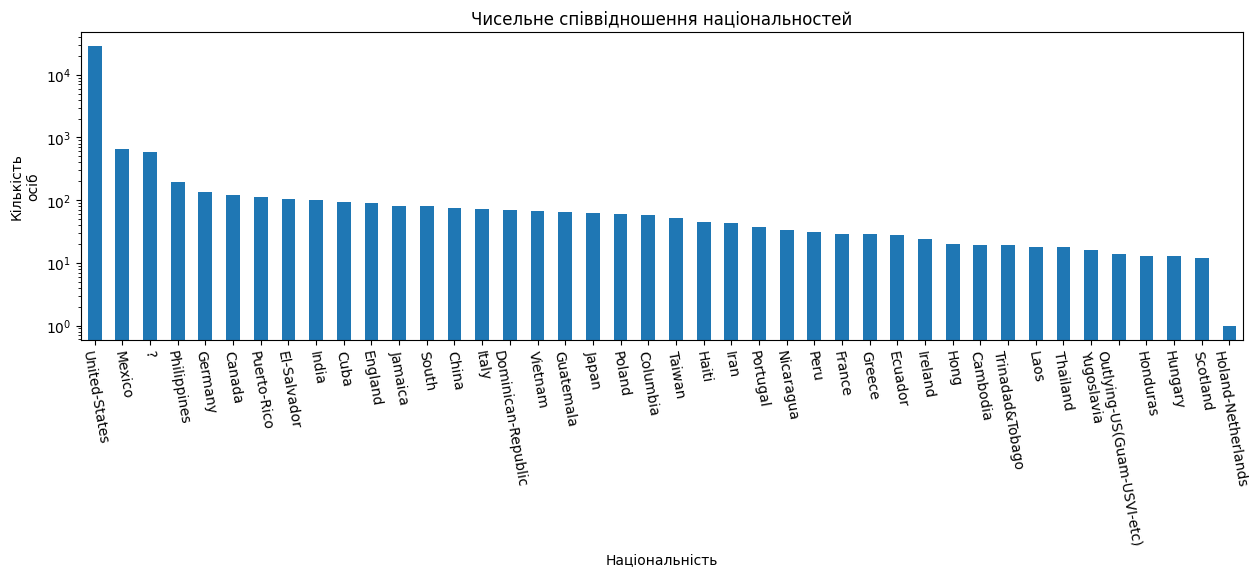

In [4]:
# count_of_germany_people: int = raw_data_frame[raw_data_frame["native-country"] == "Germany"].shape[0]
count_of_germany_people: int = raw_data_frame["native-country"].value_counts()["Germany"]
percent_of_germany_people: float = (count_of_germany_people / raw_data_frame_rows) * 100

print(f"Кількість громодян Германії становить: {count_of_germany_people} людина/людини/людей.")
print(f"Доля громодян Германії становить: {percent_of_germany_people} %.\nЯкщо округлити, то доля громодян Германії становить: {round(percent_of_germany_people, 2)} %\n")

##  *На 100 балів =)
all_nationalities: pd.Series = raw_data_frame["native-country"].value_counts()
countries_list: pd.Index = all_nationalities.index
people_counts_of_all_nationalities: np.ndarray = all_nationalities.values

# Діаграма чисельного співвідношення через pandas
all_nationalities.plot.bar(
    x=people_counts_of_all_nationalities,
    y=countries_list,
    figsize=(15, 4),
    title="Чисельне співвідношення національностей",
    logy=True,
    xlabel="Національність",
    ylabel="Кількість\nосіб",
    rot=280,
    )

# ### Діаграма чисельного співвідношення
# plt.figure(figsize=(18, 4))
# bars: BarContainer = plt.bar(x=countries_list, height=people_counts_of_all_nationalities)
# print(bars)
# plt.xlabel(xlabel="Національність")
# plt.ylabel(ylabel="Кількість")
# plt.title(label="Чисельне співвідношення національностей")
# plt.xticks(rotation="vertical")

# for bar, count in zip(bars, people_counts_of_all_nationalities):
#     plt.text(x=bar.get_x() + bar.get_width() / 2, y=count, s=str(count), ha="center", va="bottom")
# plt.show()


# ### Pie-діаграма відсоткового співвідношення через matplotlib. (Не дуже гарно виглядає через те, що США займає майже 90 відсотків...)
# all_percentages: np.ndarray = (people_counts_of_all_nationalities / raw_data_frame_rows) * 100
# plt.figure(figsize=(15, 10))
# plt.pie(x=all_percentages, labels=countries_list, autopct="%1.1f%%")
# plt.legend(loc="best", bbox_to_anchor=(1, 1), title="Національність")
# plt.title(label="Відсоткове співвідношення національностей")
# plt.show()


### **4-5. Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак *salary*) и тех, кто получает менее 50K в год? **

In [12]:
# В датасеті salary <=50K отримують 24720 людей, та >50K 7841 людей.
# print(raw_data_frame["salary"].value_counts())

# В завданні вказано порахувати середній вік, середньоквадратичні відхилення віку тих, хто заробряє <50К,
# але такого показнику немає. Тому рахуємо те що є:

# salary_lt_50: pd.DataFrame = raw_data_frame[raw_data_frame["salary"] == "<50K"]["age"]  #!
# salary_lte_50: pd.DataFrame = raw_data_frame[raw_data_frame["salary"] == "<=50K"]["age"]
# salary_gt_50: pd.DataFrame = raw_data_frame[raw_data_frame["salary"] == ">50K"]["age"]

group_by_salary: DataFrameGroupBy = raw_data_frame.groupby(by="salary")

mean_age: pd.Series = group_by_salary["age"].mean()
std_age: pd.Series = group_by_salary["age"].std()

print(f"Середній вік, та середньоквадратичні відхилення віку тих, хто заробряє <=50K на рік становить:\n"
      f"Середній вік: {mean_age['<=50K']} років.\n"
      f"Середньоквадратичне відхилення віку: {std_age['<=50K']}.", end="\n\n")
print(f"Середній вік, та середньоквадратичні відхилення віку тих, хто заробряє >50K на рік становить:\n"
      f"Середній вік: {mean_age['>50K']} років.\n"
      f"Середньоквадратичне відхилення віку: {std_age['>50K']}.")


Середній вік, та середньоквадратичні відхилення віку тих, хто заробряє <=50K на рік становить:
Середній вік: 36.78373786407767 років.
Середньоквадратичне відхилення віку: 14.020088490824866.

Середній вік, та середньоквадратичні відхилення віку тих, хто заробряє >50K на рік становить:
Середній вік: 44.24984058155847 років.
Середньоквадратичне відхилення віку: 10.519027719851843.


### **6. Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак *education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters* или *Doctorate*)**

Заробляють більше 50к на рік: 7841 людина.
З них не мають вищої освіти: 3306, це - 42.16298941461548 %
Отже це НЕПРАВДА що лише люди з вищою освітою заробляють більше 50к



<Axes: title={'center': 'Співвідношення людей з вищою освітою+, та людей без вищої освіти:'}, ylabel='count'>

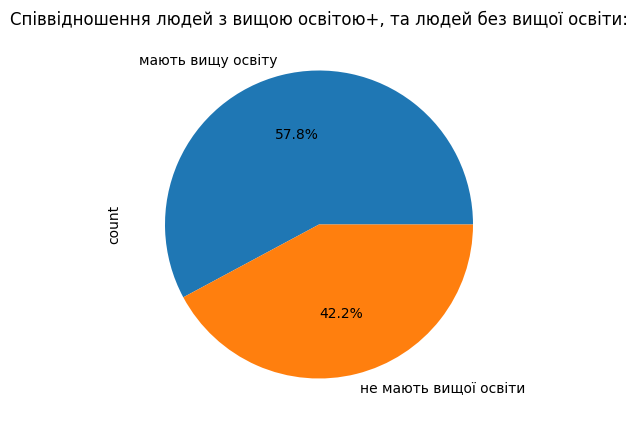

In [6]:
high_educations: tuple = ("Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate")

salary_gt_50: pd.DataFrame = raw_data_frame[raw_data_frame["salary"] == ">50K"]
print(f"Заробляють більше 50к на рік: {salary_gt_50.shape[0]} людина.")

with_high_education: int = salary_gt_50[salary_gt_50["education"].isin(values=high_educations)].shape[0]
without_high_education: int = salary_gt_50[~salary_gt_50["education"].isin(values=high_educations)].shape[0]

# ### ALSO WORKS
# METHOD 1:
# salary_gt_50["education_group"] = salary_gt_50["education"].apply(lambda x: "мають вищу освіту" if x in high_educations else "не мають вищої освіти")
# METHOD 2:

# lt_hight_education: tuple = tuple(set(salary_gt_50["education"]) - set(high_educations))
# with_high_education = salary_gt_50[salary_gt_50["education"].isin(high_educations)].shape[0]
# without_high_education = salary_gt_50[salary_gt_50["education"].isin(others)].shape[0]
####

print(f"З них не мають вищої освіти: {without_high_education}, це - {(100 * without_high_education) / salary_gt_50.shape[0]} %")

# Правда чи ні
true_or_false: bool = salary_gt_50["education"].isin(values=high_educations).all()
print(f"Отже це {'ПРАВДА' if true_or_false else 'НЕПРАВДА'} що лише люди з вищою освітою заробляють більше 50к", end="\n\n")

# Робимо Pie діаграму
result: pd.DataFrame = pd.DataFrame(data={
    "category": ["мають вищу освіту", "не мають вищої освіти"],
    "count": [with_high_education, without_high_education]
    })

result.plot.pie(
    y="count",
    labels=result["category"],
    legend=False,
    figsize=(5, 5),
    title="Співвідношення людей з вищою освітою+, та людей без вищої освіти:",
    autopct="%1.1f%%"
    )


### **7. Выведите статистику возраста для каждой расы (признак *race*) и каждого пола. Используйте *groupby* и *describe*. Найдите таким образом максимальный возраст мужчин расы *Amer-Indian-Eskimo*.**

Максимальний вік чоловіків раси Amer-Indian-Eskimo дорівнює 82.0


count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                             75%   max  
race               sex                  
Amer-Indian-Eskimo Female  46.00  80.0  
                   Male    45.00  82.0  
Asian-Pac-Islander Female  43.75  75.0  
                   Male    46.00  90.0  
Black              Female  46.00  90.0  
                   Male    46.00  90.0  
Other              Female  39.00  74.0  
                   Male    42.00  77.0  
White              Female  46.00  90.0  
                   Male    49.00  90.0

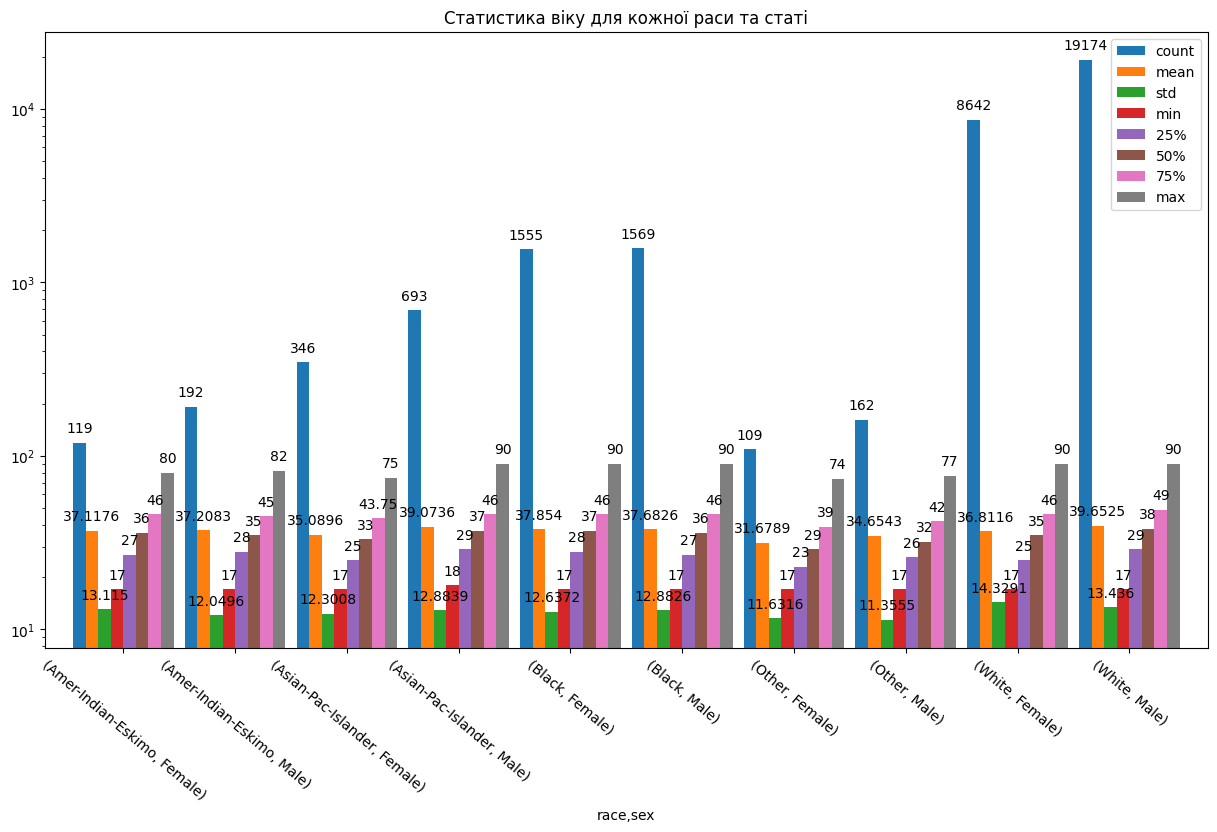

In [7]:
age_statistics: pd.DataFrame = raw_data_frame.groupby(by=["race", "sex"])["age"].describe()
# age_statistics: pd.DataFrame = raw_data_frame.groupby(by=["race"])["age"].describe()
# age_statistics: pd.DataFrame = raw_data_frame.groupby(by=["sex"])["age"].describe()

age_statistics_plot: Axes = age_statistics.plot.bar(
    figsize=(15, 8),
    title="Статистика віку для кожної раси та статі",
    logy=True,
    rot=320,
    width=0.9
)

for container in age_statistics_plot.containers:
    age_statistics_plot.bar_label(container=container, padding=5)

# Максимальний вік чоловіків раси Amer-Indian-Eskimo
amer_indian_eskimo_male_max_age: np.float64 = age_statistics.loc[("Amer-Indian-Eskimo", "Male"), "max"]
print("Максимальний вік чоловіків раси Amer-Indian-Eskimo дорівнює", amer_indian_eskimo_male_max_age)

age_statistics


### **8. Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак *marital-status*)? Женатыми считаем тех, у кого *marital-status* начинается с *Married* (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.**

Більша доля чоловіків, які заробляють більше >50K серед одружених.


Maried        5965
Not Maried     697
Name: marital-status, dtype: int64

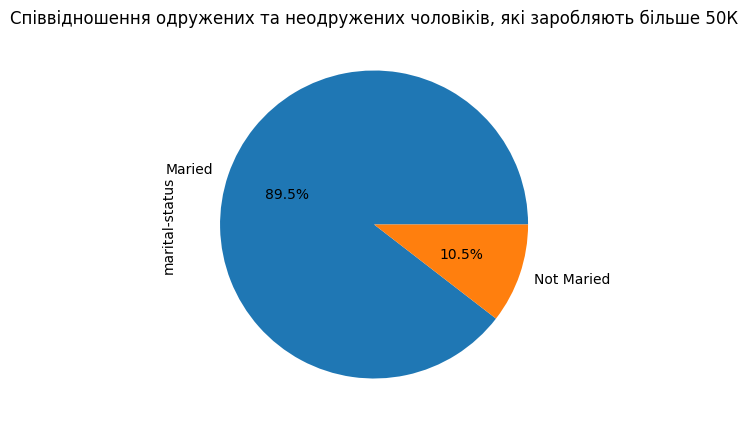

In [8]:
males_data_frame: pd.DataFrame = raw_data_frame[(raw_data_frame["sex"] == "Male") & (raw_data_frame["salary"] == ">50K")]

maried_males_list: list = ["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"]
not_maried_males_list: list = list(set(males_data_frame["marital-status"]) - set(maried_males_list))

marital_status_counts: pd.Series = males_data_frame["marital-status"].value_counts()
marital_status_counts["Maried"]: np.int64 = sum(marital_status_counts[maried_males_list])
marital_status_counts["Not Maried"]: np.int64 = sum(marital_status_counts[not_maried_males_list])
marital_status_result = marital_status_counts[["Maried", "Not Maried"]]

print(f"Більша доля чоловіків, які заробляють більше >50K серед {'одружених.' if marital_status_counts['Maried'] > marital_status_counts['Not Maried'] else 'неодружених.'}")

marital_status_result.plot.pie(
    figsize=(5, 5),
    title="Співвідношення одружених та неодружених чоловіків, які заробляють більше 50К",
    autopct="%1.1f%%"
    )

marital_status_result


### **9. Какое максимальное число часов человек работает в неделю (признак *hours-per-week*)? Сколько людей работают такое количество часов и каков среди них процент зарабатывающих много?**

In [9]:
max_hours_per_week: np.int16 = raw_data_frame["hours-per-week"].max()
print(f"Максимальну кількість годин, яку на тиждень працює людина складає: {max_hours_per_week} годин.")

people_count_who_work_max_hours_per_week: int = len(raw_data_frame[raw_data_frame["hours-per-week"] == max_hours_per_week])
# raw_data_frame[raw_data_frame["hours-per-week"] >= max_hours_per_week].groupby(["hours-per-week"])["hours-per-week"].describe()
print(f"Максимальну кількість годин на тиждень ({max_hours_per_week} годин) працює {people_count_who_work_max_hours_per_week} осіб.")

salary_group: pd.Series = raw_data_frame[raw_data_frame["hours-per-week"] == max_hours_per_week]["salary"].value_counts()

gt50_salary: np.int64 = salary_group[">50K"]
lte50_salary: np.int64 = salary_group["<=50K"]

gt50_percents: np.float64 = round((gt50_salary / people_count_who_work_max_hours_per_week) * 100, 2)
lte50_percents: np.float64 = round((lte50_salary / people_count_who_work_max_hours_per_week) * 100, 2)

print(f"З них багато (>50K) заробляє {gt50_salary} людей, що складає {gt50_percents}%. Інші {lte50_salary} людей ({lte50_percents}%) заробляють мало (<=50K).")


Максимальну кількість годин, яку на тиждень працює людина складає: 99 годин.
Максимальну кількість годин на тиждень (99 годин) працює 85 осіб.
З них багато (>50K) заробляє 25 людей, що складає 29.41%. Інші 60 людей (70.59%) заробляють мало (<=50K).


### **10. Посчитайте среднее время работы (*hours-per-week*) зарабатывающих мало и много (*salary*) для каждой страны (*native-country*).**

native-country  salary
?               <=50K     40.164760
                >50K      45.547945
Cambodia        <=50K     41.416667
                >50K      40.000000
Canada          <=50K     37.914634
                            ...    
United-States   >50K      45.505369
Vietnam         <=50K     37.193548
                >50K      39.200000
Yugoslavia      <=50K     41.600000
                >50K      49.500000
Name: mean, Length: 82, dtype: float64

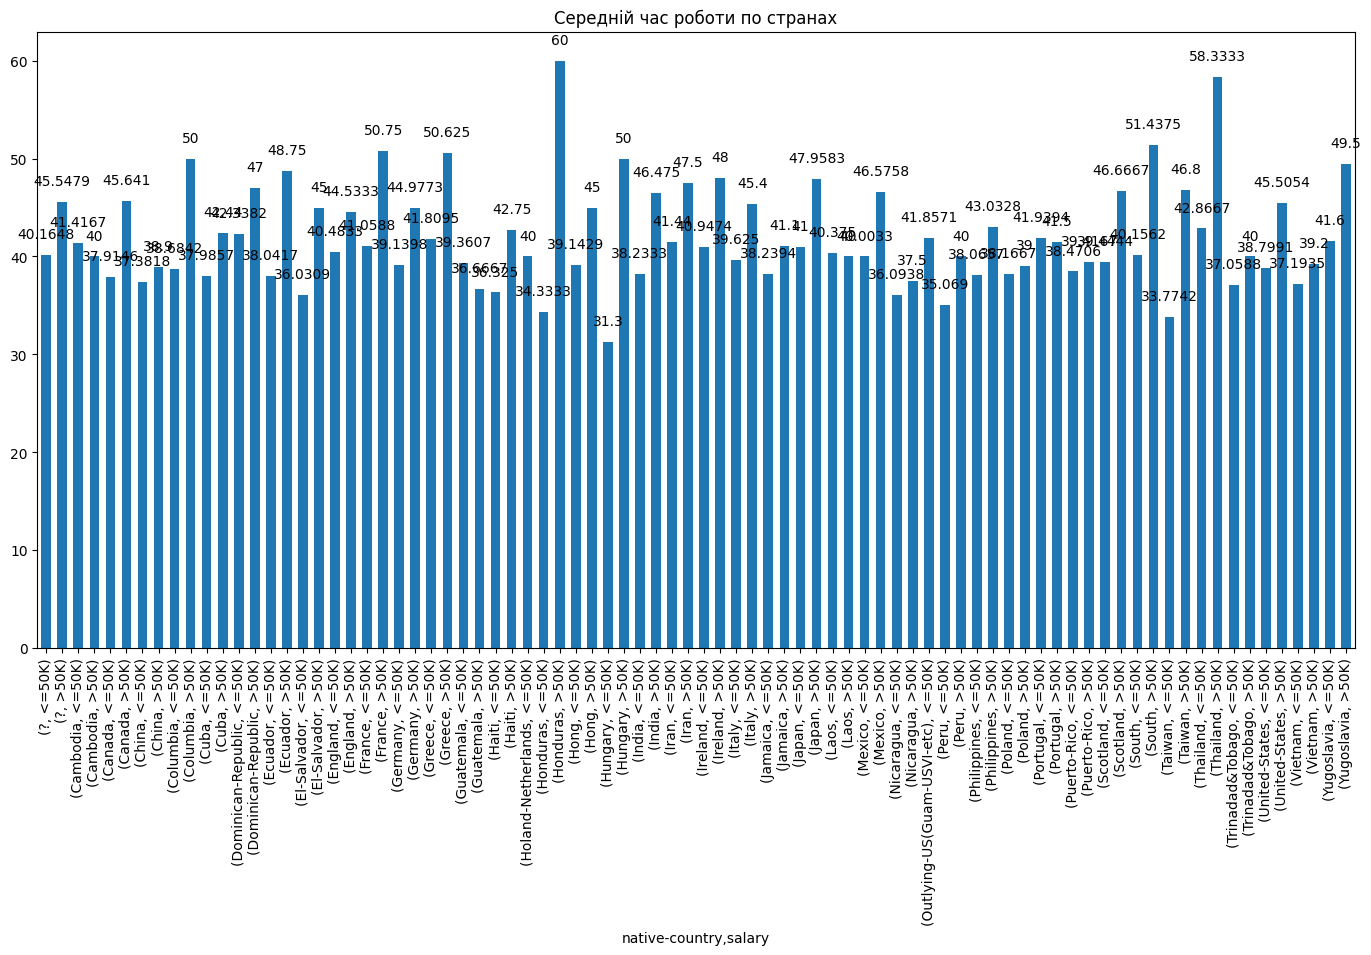

In [10]:
avg_working_time_statistics: pd.DataFrame = raw_data_frame.groupby(by=["native-country", "salary"])["hours-per-week"].describe()["mean"]

avg_working_time_statistics_plot: Axes = avg_working_time_statistics.plot.bar(
    figsize=(17, 8),
    title="Середній час роботи по странах",
    rot=90,
    width=0.6
)

# To view values above bars
for container in avg_working_time_statistics_plot.containers:
    avg_working_time_statistics_plot.bar_label(container=container, padding=10)

avg_working_time_statistics
